<a href="https://colab.research.google.com/github/ojasrai17/ML_Lab_A1_10/blob/main/ML_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: SVC on Iris Dataset
### Name: Rishi Pande A-14


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Iris.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df['Species']=df['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

<ipython-input-8-b0659d577101>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species']=df['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})


In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']],df['Species'], test_size = 0.2)

In [ ]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
46,5.1,3.8,1.6,0.2
126,6.2,2.8,4.8,1.8
96,5.7,2.9,4.2,1.3
42,4.4,3.2,1.3,0.2
125,7.2,3.2,6.0,1.8
...,...,...,...,...
86,6.7,3.1,4.7,1.5
22,4.6,3.6,1.0,0.2
113,5.7,2.5,5.0,2.0
79,5.7,2.6,3.5,1.0


In [ ]:
Y_train

,Species
46,1
126,3
96,2
42,1
125,3
...,...
86,2
22,1
113,3
79,2


In [ ]:
clf = SVC(kernel = 'linear')
clf.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([1, 3, 1, 3, 2, 1, 3, 1, 1, 2, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 2, 3,
       2, 3, 3, 3, 2, 1, 1, 3])

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0,  5,  0],
       [ 0,  0, 14]])

Text(33.22222222222222, 0.5, 'Truth or Actual Value')

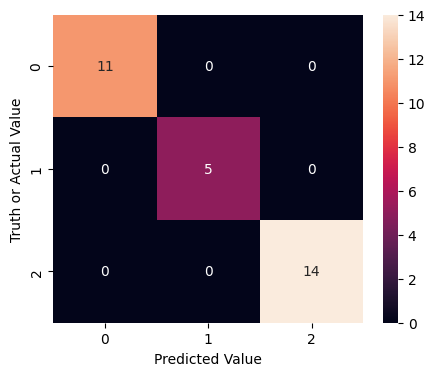

In [ ]:
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot =True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

In [ ]:
print("Accuracy of log_reg: ", accuracy_score(Y_test,y_pred))
print("Precision of log reg: ", precision_score(Y_test, y_pred, average="weighted"))
print('F1 score of log_reg: ', f1_score(Y_test, y_pred, average="weighted"))
print("Report of log_reg: ", metrics.classification_report(Y_test, y_pred))

Accuracy of log_reg:  1.0
Precision of log reg:  1.0
F1 score of log_reg:  1.0
Report of log_reg:                precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

